<a href="https://colab.research.google.com/github/HopeRetina/image_related/blob/main/Image_compression_wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})

A = imread('cute.jpeg')
B = np.mean(A, -1) # Convert RGB to grayscale

Wavelet decompositioin (2 level)

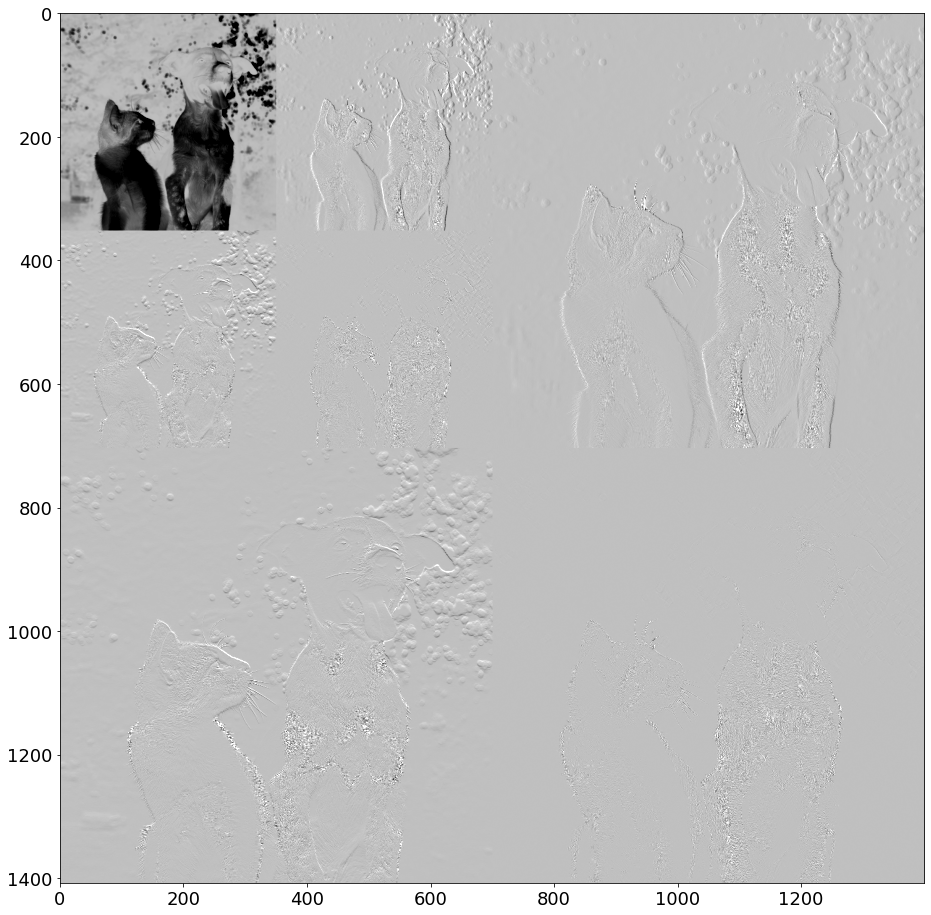

<Figure size 1296x1152 with 0 Axes>

In [3]:
n = 2
w = 'db1'
coeffs = pywt.wavedec2(B, wavelet=w, level=n)

# Normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
  coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr, cmap='gray_r', vmin=-0.25, vmax=0.75)
fig = plt.figure(figsize=(18, 16))
plt.show()


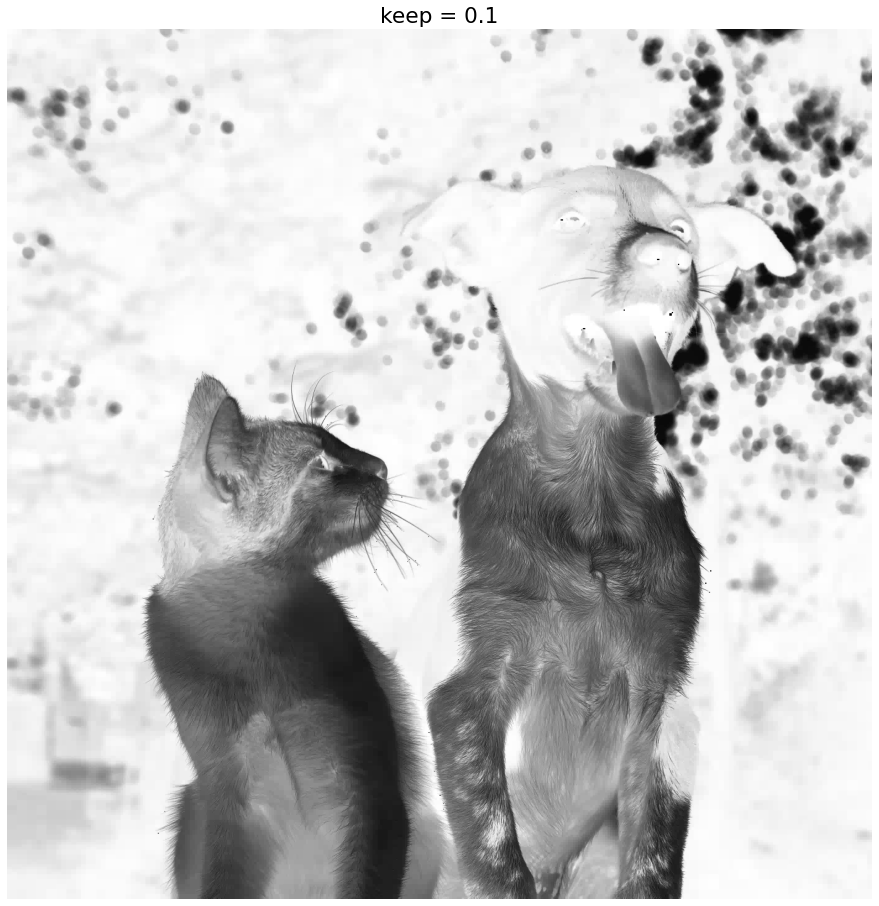

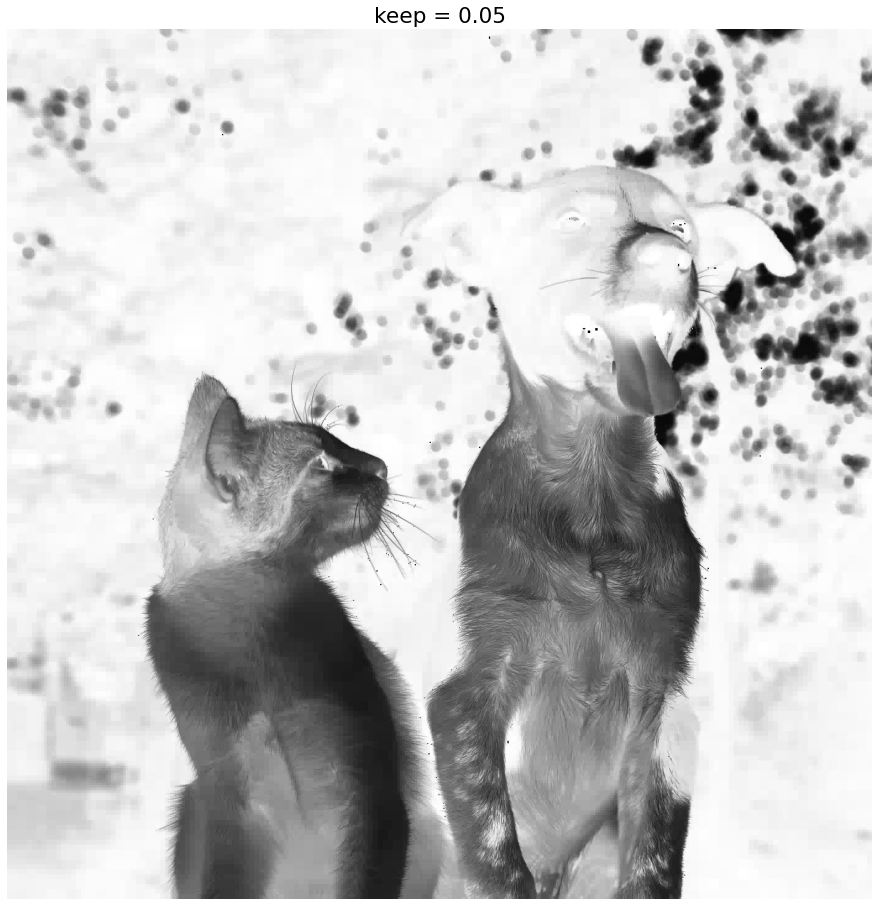

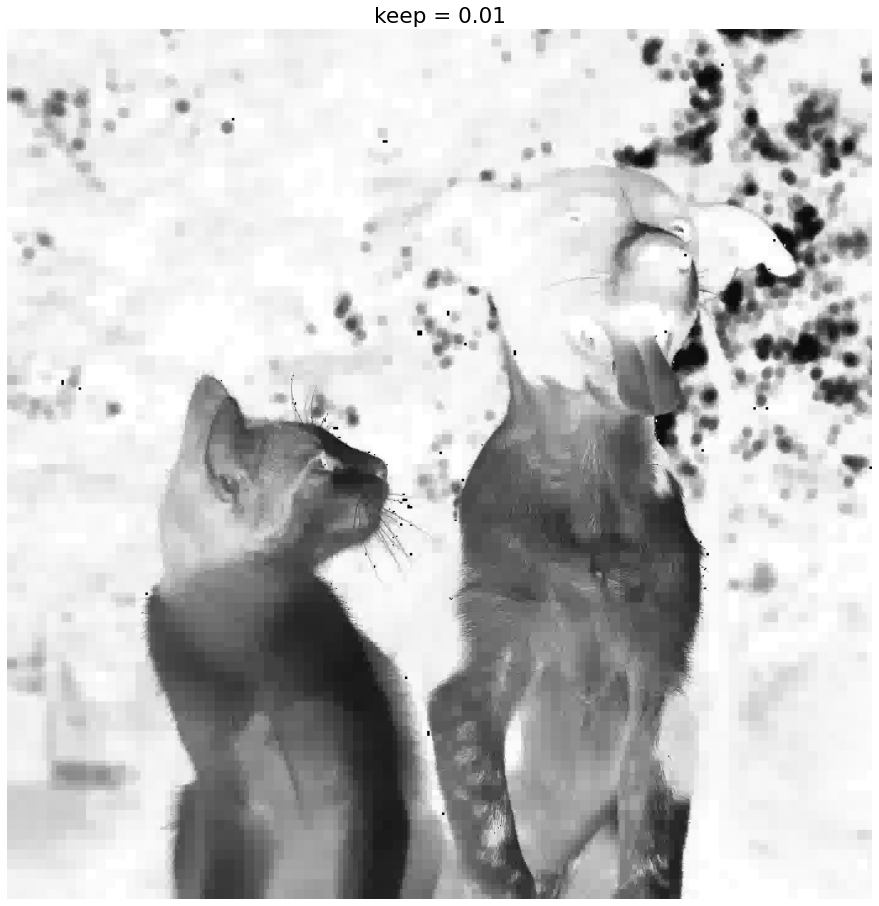

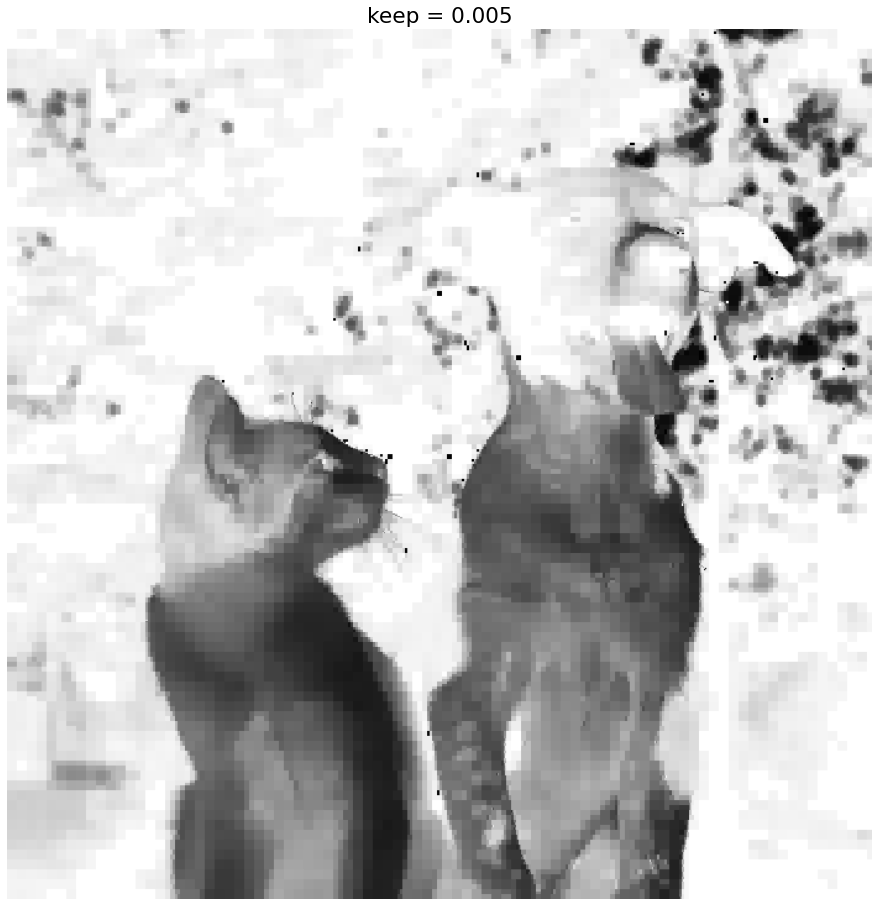

In [5]:
n = 4 # 4-level decomposition
w = 'db1'
coeffs = pywt.wavedec2(B, wavelet=w, level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
  thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
  ind = np.abs(coeff_arr) > thresh
  Cfilt = coeff_arr * ind # Threshold small indices

  coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')

  #Plot reconstruction
  Arecon = pywt.waverec2(coeffs_filt, wavelet=w)
  plt.figure()
  plt.imshow(Arecon.astype('uint8'), cmap='gray_r')
  plt.axis('off')
  plt.title('keep = ' + str(keep))
